In [27]:
# Imports for email topology analyis
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

In [30]:
# Use NetworkX to read the raw dataset (edgelist) and form a graph.
raw_dataset_file = open('email.edgelist.txt', 'rb')
emails = nx.read_edgelist(raw_dataset_file)

# Number of nodes
print("Total number of nodes: ", len(emails.nodes()))
# List of sorted degrees
sorted_degrees = sorted(emails.degree(), key=lambda x: x[1])[:-5]
sorted_degrees_student = sorted(emails.degree(), key=lambda x: x[1])[:-27]

# Look at the last five sorted node entries for the overall network and student network
print(sorted_degrees[-5:])
print(sorted_degrees_student[-5:])

# Get mean degrees for total and student networks
print("Total network mean degree: ", np.mean([y for (x,y) in sorted_degrees]))
print("Student network mean degree: ", np.mean([y for (x,y) in sorted_degrees_student]))

Total number of nodes:  57194
[('290', 404), ('1965', 425), ('1335', 450), ('13027', 596), ('180', 601)]
[('1648', 247), ('6', 248), ('12600', 250), ('13443', 260), ('1315', 266)]
Total network mean degree:  3.0146706534473413
Student network mean degree:  2.8793009953294733


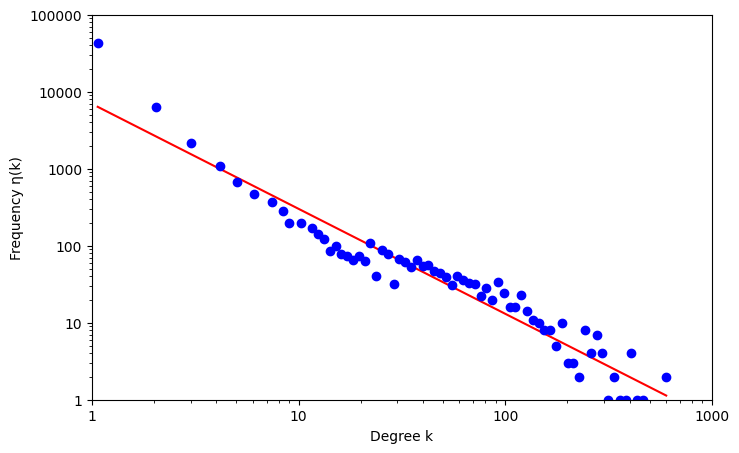

In [31]:
# PLOT 1: Plot the degree distribution of the email network.

# Set the figure and axis for the plot.
fig, ax = plt.subplots(figsize=(8, 5))

# Create a dictonary of all node degrees within our acceptable range.
sorted_degrees = sorted(emails.degree(), key=lambda x: x[1])[:-5]
degrees = dict([(x, y) for (x, y) in sorted_degrees])
# Grab the minimum and maximum degree from the network.
min_degree = min(degrees.values())
max_degree = max(degrees.values())

# Create logged bins using numpy--we'll create 100 bins for this graph.
bins = np.logspace(np.log10(min_degree), np.log10(max_degree), num=100)
# Create histogram using the list of all node degrees and the logged 
# bins we just created.
degree_hist, degrees = np.histogram(list(degrees.values()), bins=bins)

# Filter out zero values before performing the logarithmic transformation.
# This removes any bins that contain no value.
non_zero_mask = degree_hist != 0
degree_hist = degree_hist[non_zero_mask]
degrees = degrees[1:][non_zero_mask]

# Fit a line to the data using numpy.polyfit.
# Use a degree of 1 for a linear fit.
slope, intercept = np.polyfit(np.log10(degrees), np.log10(degree_hist), 1)
# Create the best-fit line using the slope and intercept.
best_fit_line = lambda x: 10**(intercept) * x**slope
# Plot the best-fit line.
ax.loglog(degrees, best_fit_line(degrees), 'r-')

# Plot the double log plot.
ax.loglog(degrees, degree_hist, "bo") 

# Set the x-axis and y-axis tick formatters to display full labels.
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False, useOffset=False))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False, useOffset=False))

# Add graph formatting.
plt.xlim(1,1000)
plt.ylim(1,100000)

plt.xlabel('Degree k')
plt.ylabel('Frequency η(k)')

# Show graph.
plt.show()

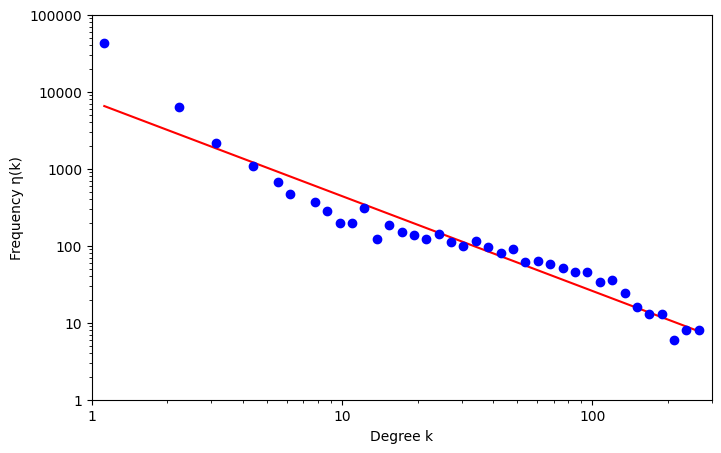

In [33]:
# PLOT 2: Plot the degree distribution of the email network of just students.

# Set the figure and axis for the plot.
fig, ax = plt.subplots(figsize=(8, 5))

# Create a dictonary of all node degrees within our acceptable range (k_upper).
degrees = dict([(x, y) for (x, y) in emails.degree() if y <= 266])
# Grab the minimum and maximum degree from the network.
min_degree = min(degrees.values())
max_degree = max(degrees.values())

# Create logged bins using numpy--we'll create 50 bins for this graph.
bins = np.logspace(np.log10(min_degree), np.log10(max_degree), num=50)
# Create histogram using the list of all node degrees and the logged 
# bins we just created.
degree_hist, degrees = np.histogram(list(degrees.values()), bins=bins)

# Filter out zero values before performing the logarithmic transformation.
# This removes any bins that contain no value.
non_zero_mask = degree_hist != 0
degree_hist = degree_hist[non_zero_mask]
degrees = degrees[1:][non_zero_mask]

# Fit a line to the data using numpy.polyfit.
# Use a degree of 1 for a linear fit.
slope, intercept = np.polyfit(np.log10(degrees), np.log10(degree_hist), 1)
# Create the best-fit line using the slope and intercept.
best_fit_line = lambda x: 10**(intercept) * x**slope
# Plot the best-fit line.
ax.loglog(degrees, best_fit_line(degrees), 'r-')

# Plot the double log plot.
ax.loglog(degrees, degree_hist, "bo") 

# Set the x-axis and y-axis tick formatters to display full labels.
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False, useOffset=False))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False, useOffset=False))

# Add graph formatting.
plt.xlim(1,300)
plt.ylim(1,100000)

plt.xlabel('Degree k')
plt.ylabel('Frequency η(k)')

# Show graph.
plt.show()